In [4]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import tabpy_client
from sklearn.cross_validation import cross_val_score, cross_val_predict, StratifiedKFold

#classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#metrics
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc


%matplotlib inline

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
df = pd.read_csv('df_students.csv')
df.head()

,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,1,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [6]:
df.columns

Index(['G1', 'G2', 'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3',
       'Pstatus_T', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'failures', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other'],
      dtype='object')

## Train Test Split

In [99]:
X = df.drop(['G1','G2','G3'], axis = 1)
y = df['G1']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### with normalization

In [9]:
normalizer = preprocessing.Normalizer()
X_norm = normalizer.fit_transform(X)

In [10]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

In [11]:
import statsmodels.api as sm
x = sm.add_constant(X_train, prepend = False)
model = sm.GLM(y_train, X_train)
model = model.fit()
model.summary()

/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:                     G1   No. Observations:                   434
Model:                            GLM   Df Residuals:                       395
Model Family:                Gaussian   Df Model:                            38
Link Function:               identity   Scale:              0.12009841307068914
Method:                          IRLS   Log-Likelihood:                 -135.47
Date:                Mon, 19 Feb 2018   Deviance:                        47.439
Time:                        21:22:58   Pearson chi2:                      47.4
No. Iterations:                     2                                          
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
school_MS             0.1880      0.043      4.413      0.000       0.105       0.272
sex_M                 0.0389      0.040      0.966      0.334      -0.040       0.118
address_U            -0.0216      0.042     -0.518      0.605      -0.103       0.060
famsize_LE3          -0.0135      0.040     -0.341      0.733      -0.091       0.064
Pstatus_T             0.0417      0.057      0.736      0.462      -0.069       0.153
schoolsup_yes         0.2400      0.057      4.219      0.000       0.129       0.352
famsup_yes            0.0031      0.036      0.085      0.932      -0.068       0.074
paid_yes              0.0767      0.075      1.024      0.306      -0.070       0.223
activities_yes       -0.0339      0.036     -0.955      0.340      -0.103       0.036
nursery_yes          -0.0115      0.043     -0.267      0.789      -0.096       0.073
higher_yes           -0.4078      0.058     -7.011      0.000      -0.522      -0.294
internet_yes          0.0263      0.044      0.602      0.547      -0.059       0.112
romantic_yes         -0.0034      0.037     -0.091      0.927      -0.076       0.069
age                   0.0229      0.009      2.532      0.011       0.005       0.041
Medu                  0.0204      0.025      0.820      0.412      -0.028       0.069
Fedu                 -0.0191      0.023     -0.828      0.408      -0.064       0.026
traveltime           -0.0009      0.025     -0.035      0.972      -0.049       0.047
studytime            -0.0435      0.022     -1.948      0.051      -0.087       0.000
famrel               -0.0208      0.019     -1.120      0.263      -0.057       0.016
freetime              0.0122      0.017      0.700      0.484      -0.022       0.046
goout                -0.0143      0.017     -0.828      0.408      -0.048       0.020
Dalc                  0.0317      0.024      1.347      0.178      -0.014       0.078
Walc                 -0.0042      0.019     -0.226      0.822      -0.041       0.033
health                0.0043      0.013      0.345      0.730      -0.020       0.029
absences              0.0090      0.004      2.234      0.025       0.001       0.017
failures              0.2195      0.033      6.743      0.000       0.156       0.283
Mjob_health           0.0129      0.086      0.151      0.880      -0.155       0.181
Mjob_other           -0.0217      0.048     -0.455      0.649      -0.115       0.072
Mjob_services        -0.1068      0.060     -1.775      0.076      -0.225       0.011
Mjob_teacher         -0.0464      0.083     -0.559      0.576      -0.209       0.116
Fjob_health           0.1465      0.127      1.152      0.250      -0.103       0.396
Fjob_other            0.0885      0.071      1.246      0.213      -0.051       0.228
Fjob_services         0.1143      0.075      1.525      0.127      -0.033       0.261
Fjob_teacher          0.1272      0.120      1.064      

In [12]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression with Regularization

In [24]:
Cs = np.logspace(-4., 4., 30)
logCV = LogisticRegressionCV(Cs=Cs,scoring='roc_auc', cv = 10)

In [25]:
logCV.fit(X_train,y_train)

LogisticRegressionCV(Cs=array([1.00000e-04, 1.88739e-04, 3.56225e-04, 6.72336e-04, 1.26896e-03,
       2.39503e-03, 4.52035e-03, 8.53168e-03, 1.61026e-02, 3.03920e-02,
       5.73615e-02, 1.08264e-01, 2.04336e-01, 3.85662e-01, 7.27895e-01,
       1.37382e+00, 2.59294e+00, 4.89390e+00, 9.23671e+00, 1.74333e+01,
       3.29034e+01, 6.21017e+01, 1.17210e+02, 2.21222e+02, 4.17532e+02,
       7.88046e+02, 1.48735e+03, 2.80722e+03, 5.29832e+03, 1.00000e+04]),
           class_weight=None, cv=10, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=0)

In [26]:
y_pred_logCV = logCV.predict(X_test)

#best score
logCV.C_

array([0.72789538])

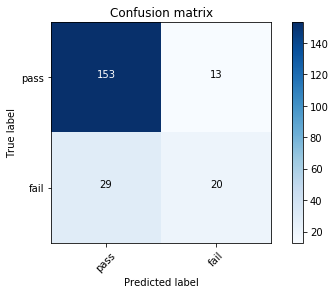

In [27]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred_logCV), ['pass', 'fail'])

## Random Forest GridsearchCV

In [28]:
rfc = RandomForestClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [9, 18, 27, 36, 45, 54, 63, 100, 150],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],}
 
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

{'max_depth': 10, 'n_estimators': 27}


best parameters = 'max_depth': 15, 'n_estimators': 18

## Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=1,n_estimators =100)

In [ ]:
param_grid = {'max_depth': range(5,15), 'min_samples_split': range(5,10,1), 'learning_rate': [ 0.01, 0.1, 0.2, 0.3]}
 
grid = GridSearchCV(gb, param_grid, cv=10,scoring= 'roc_auc')
grid.fit(X_train,y_train)

In [ ]:
print (grid.best_params_)

best parameters = 'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 9

In [ ]:
gb_grid = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 5, min_samples_split = 9)
gb_grid.fit(X_train, y_train)

## Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

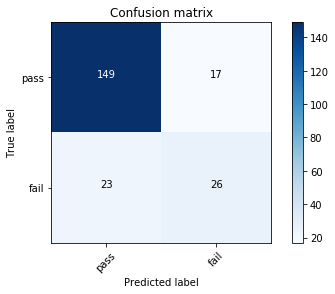

In [26]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred_gnb), ['pass', 'fail'])

In [107]:
threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
rf2 = RandomForestClassifier(max_depth=15, n_estimators=18, random_state = 30)
rf2.fit(X_train, y_train)
f1_score_list = []
precision_list = []
recall_fail_list = []

for i in threshold:
    y_pred_prob = rf2.predict_proba(X_test)[:,1]
    y_pred = rf2.predict(X_test)
    y_pred_cutoff = np.where(y_pred_prob >= i, 1, 0)
    
    f1_score_list.append(f1_score(y_test, y_pred_cutoff))
    precision_list.append(precision_score(y_test, y_pred_cutoff))
    recall_fail_list.append(recall_score(y_test, y_pred_cutoff, pos_label=1))
    
threshold_comparison = pd.DataFrame({'precision':precision_list, 'recall-fail':recall_fail_list, 'f1':f1_score_list})
    
threshold_comparison.set_index([threshold])



,f1,precision,recall-fail
0.1,0.463768,0.303797,0.979592
0.2,0.523490,0.390000,0.795918
0.3,0.587156,0.533333,0.653061
0.4,0.543478,0.581395,0.510204
0.5,0.469136,0.593750,0.387755
0.6,0.388060,0.722222,0.265306
0.7,0.185185,1.000000,0.102041
0.8,0.040000,1.000000,0.020408


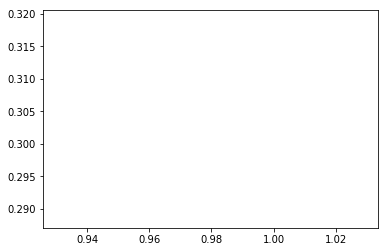

In [108]:
plt.plot(threshold_comparison['recall-fail'][0],threshold_comparison['precision'][0])

In [109]:
y_pred_prob = rf2.predict_proba(X_test)[:,1]
y_pred = rf2.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
i = np.arange(len(tpr)) # index for df

sensitivity = []


roc

,1-fpr,fpr,tf,thresholds,tpr
0,1.000000,0.000000,-0.979592,0.833333,0.020408
1,1.000000,0.000000,-0.897959,0.777778,0.102041
2,0.987952,0.012048,-0.804278,0.666667,0.183673
3,0.969880,0.030120,-0.704573,0.611111,0.265306
4,0.933735,0.066265,-0.607204,0.555556,0.326531
5,0.921687,0.078313,-0.533932,0.500000,0.387755
6,0.891566,0.108434,-0.381362,0.444444,0.510204
7,0.867470,0.132530,-0.275633,0.388889,0.591837
8,0.831325,0.168675,-0.178264,0.333333,0.653061
9,0.753012,0.246988,-0.059134,0.277778,0.693878


Area under the ROC curve : 0.742009


/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


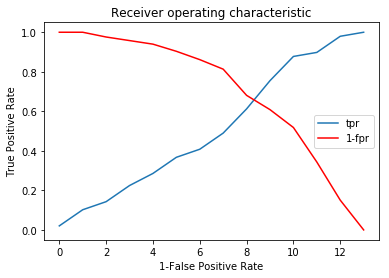

In [103]:
# extract false positive, true positive rate


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), 
                    '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 
                    'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'], label='tpr')
plt.plot(roc['1-fpr'], color = 'red', label='1-fpr')
plt.legend(loc='best')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

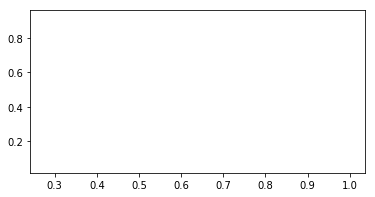

In [87]:
plt.figure(figsize=(6,3))
for i in range(len(threshold)):
    plt.plot(threshold_comparison['precision'][i], threshold_comparison['recall-fail'][i], label = threshold[i] )

In [55]:
y_pred_prob = rf2.predict_proba(X_test)[:,1]
y_pred_prob

array([0.22222222, 0.        , 0.27777778, 0.16666667, 0.11111111,
       0.11111111, 0.05555556, 0.88888889, 0.16666667, 0.        ,
       0.11111111, 0.27777778, 0.05555556, 0.05555556, 0.16666667,
       0.05555556, 0.11111111, 0.55555556, 0.16666667, 0.        ,
       0.        , 0.11111111, 0.16666667, 0.11111111, 0.5       ,
       0.16666667, 0.83333333, 0.05555556, 0.        , 0.16666667,
       0.27777778, 0.22222222, 0.72222222, 0.55555556, 0.27777778,
       0.05555556, 0.05555556, 0.22222222, 0.05555556, 0.27777778,
       0.27777778, 0.        , 0.05555556, 0.05555556, 0.16666667,
       0.33333333, 0.11111111, 0.        , 0.05555556, 0.22222222,
       0.44444444, 0.        , 0.22222222, 0.66666667, 0.05555556,
       0.        , 0.33333333, 0.11111111, 0.66666667, 0.77777778,
       0.72222222, 0.11111111, 0.        , 0.11111111, 0.05555556,
       0.        , 0.77777778, 0.5       , 0.83333333, 0.38888889,
       0.11111111, 0.11111111, 0.11111111, 0.22222222, 0.11111

In [56]:
y_pred_cutoff = np.where(y_pred_prob >= threshold, 1, 0)
y_pred_cutoff

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

## Models Comparison

In [45]:
Cs = np.logspace(-4., 4., 30)
models = [LogisticRegressionCV(cv=10, Cs = Cs),
          GaussianNB(),
          RandomForestClassifier(max_depth=15, n_estimators=18),
          GradientBoostingClassifier(learning_rate = 0.01, max_depth = 5, min_samples_split = 9),
          XGBClassifier()]

model_names = ['Logistic', 'Naive Bayes','Random Forest','Gradient Boosting','XGBoost']

In [46]:
accuracy = []
cutoff_accuracy = []
precision_pass = []
precision_fail = []
recall_pass = []
recall_fail = []
f1_pass = []
f1_fail = []
auc = []
threshold = 0.3

## Go through the models and find the scores
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    #predict with custom threshold
    y_pred_cutoff = np.where(y_pred_prob >= threshold, 1, 0)
    
    cutoff_accuracy.append( accuracy_score(y_test, y_pred_cutoff) )
    accuracy.append( accuracy_score(y_test, y_pred) )
    
    precision_pass.append( precision_score(y_test, y_pred_cutoff, pos_label=0) )
    precision_fail.append( precision_score(y_test, y_pred_cutoff, pos_label=1) )
    recall_pass.append( recall_score(y_test, y_pred_cutoff, pos_label=0))
    recall_fail.append( recall_score(y_test, y_pred_cutoff, pos_label=1))
    f1_pass.append( f1_score(y_test, y_pred_cutoff, pos_label=0) )
    f1_fail.append( f1_score(y_test, y_pred_cutoff, pos_label=1) )
    auc.append(roc_auc_score(y_test, y_pred_prob))
    print (confusion_matrix(y_test,y_pred_cutoff))

accuracy_df = pd.DataFrame({'accuracy':accuracy, 'auc':auc, 'precision-pass':precision_pass, 'precision-fail':precision_fail,
                            'recall-pass':recall_pass, 'recall-fail':recall_fail, 'f1-pass':f1_pass, 'f1-fail':f1_fail})
accuracy_df.set_index([model_names])

[[145  21]
 [ 22  27]]
[[145  21]
 [ 19  30]]
[[138  28]
 [ 18  31]]
[[144  22]
 [ 21  28]]
[[143  23]
 [ 21  28]]


/Users/nataliabernardo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,accuracy,auc,f1-fail,f1-pass,precision-fail,precision-pass,recall-fail,recall-pass
Logistic,0.804651,0.809688,0.556701,0.870871,0.562500,0.868263,0.551020,0.873494
Naive Bayes,0.813953,0.807475,0.600000,0.878788,0.588235,0.884146,0.612245,0.873494
Random Forest,0.818605,0.797578,0.574074,0.857143,0.525424,0.884615,0.632653,0.831325
Gradient Boosting,0.800000,0.810610,0.565657,0.870091,0.560000,0.872727,0.571429,0.867470
XGBoost,0.813953,0.813007,0.560000,0.866667,0.549020,0.871951,0.571429,0.861446


### ROC Curve

In [47]:
## Calc and store each ROC and AUC
fpr_list = []
tpr_list = []
auc_list = []
for model in models:
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(round(metrics.auc(fpr, tpr),4))

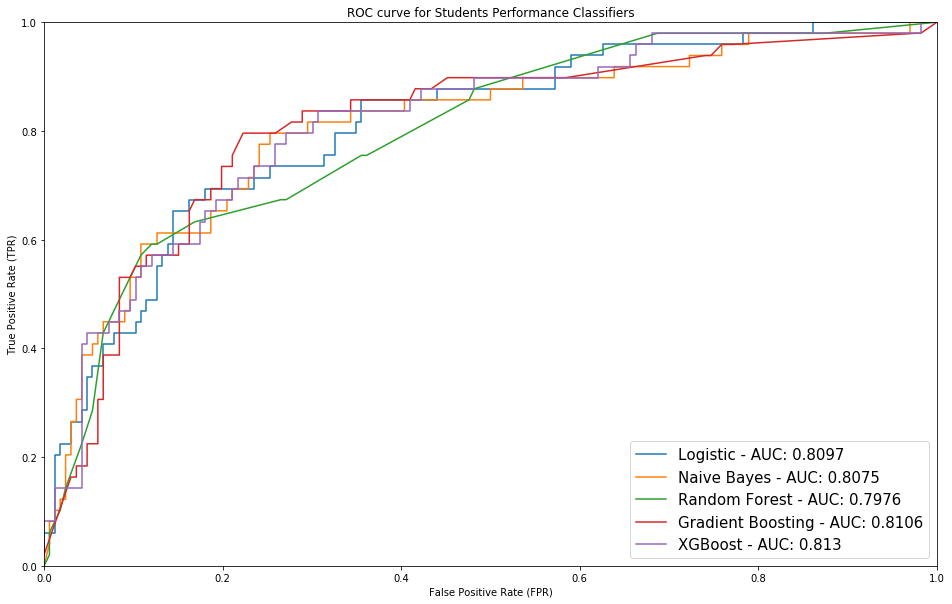

In [48]:
## Plot them all on 1 graph
plt.figure(figsize=(16,10))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('ROC curve for Students Performance Classifiers')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
for i in range(len(fpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], label = model_names[i] + ' - AUC: ' + str(auc_list[i]))
plt.legend(loc = 4, fontsize = 15)

In [49]:
# Connect to TabPy server using the client library
connection = tabpy_client.Client('http://localhost:9004/')

In [50]:
def grade_prediction(school_MS, sex_M, address_U, famsize_LE3,
       Pstatus_T, schoolsup_yes, famsup_yes, paid_yes,
       activities_yes, nursery_yes, higher_yes, internet_yes,
       romantic_yes, age, Medu, Fedu, traveltime, studytime,
       famrel, freetime, goout, Dalc, Walc, health, absences,
       failures, Mjob_health, Mjob_other, Mjob_services,
       Mjob_teacher, Fjob_health, Fjob_other, Fjob_services,
       Fjob_teacher, reason_home, reason_other, reason_reputation,
       guardian_mother, guardian_other):
    X = np.column_stack([school_MS, sex_M, address_U, famsize_LE3,
       Pstatus_T, schoolsup_yes, famsup_yes, paid_yes,
       activities_yes, nursery_yes, higher_yes, internet_yes,
       romantic_yes, age, Medu, Fedu, traveltime, studytime,
       famrel, freetime, goout, Dalc, Walc, health, absences,
       failures, Mjob_health, Mjob_other, Mjob_services,
       Mjob_teacher, Fjob_health, Fjob_other, Fjob_services,
       Fjob_teacher, reason_home, reason_other, reason_reputation,
       guardian_mother, guardian_other])
    X = scaler.transform(X)
    return encoder.inverse_transform(gbclf.predict(X)).tolist()

In [51]:
# Publish the SuggestDiagnosis function to TabPy server so it can be used from Tableau
# Using the name DiagnosticsDemo and a short description of what it does
connection.deploy('PredictionDemo',
                  grade_prediction,
                  'Returns prediction suggestion')

ConnectionError: HTTPConnectionPool(host='localhost', port=9004): Max retries exceeded with url: /endpoints (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x119d677b8>: Failed to establish a new connection: [Errno 61] Connection refused',))

In [ ]:
model = RandomForestClassifier(max_depth=15, n_estimators=18)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]


accuracy = accuracy_score(y_test, y_pred)

precision_pass = precision_score(y_test, y_pred, pos_label=0) 
precision_fail = precision_score(y_test, y_pred, pos_label=1) 
recall_pass = recall_score(y_test, y_pred, pos_label=0)
recall_fail = recall_score(y_test, y_pred, pos_label=1)
f1_pass = f1_score(y_test, y_pred, pos_label=0) 
f1_fail = f1_score(y_test, y_pred, pos_label=1) 
auc = roc_auc_score(y_test, y_pred)

print(auc, f1_fail)

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred = model.predict(X_test)

In [ ]:
fpr, tpr, thresholds =roc_curve(y_test, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]


In [ ]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 


Find_Optimal_Cutoff(y_test, y_pred_prob)

In [ ]:
Find_Optimal_Cutoff(y_test, y_pred_prob)